## 第一期 关联图：06边缘直方图 & 07边缘箱线图

## o新知识点

1.fig = plt.figure(figsize=(16, 10), dpi= 80)

2.grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2) #grid是一个二维列表,将画布切成块，采用索引的方式获得画布的内容

3.plt.hist()

4.sns.boxplot(）

5.c=df.manufacturer.astype('category').cat.codes #这是按类别编码的一种写法，之前用不同float


<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 06/50 边缘直方图

边缘直方图是在使用散点图探索横纵坐标关系的基础上，还使用直方图对横坐标和纵坐标分别进行分布探索的图像。  
这个图像在统计学的探索性分析（EDA）中常用，以探求数据是否符合统计学的一系列要求，比如说线性回归要求残差需满足正态分布，即因变量y满足正态分布等等。  
在机器学习中，我们也会探索数据是否处于偏态，以指导是否需要对数据做归一化或者标准化等处理。

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/06%20%E7%9B%B4%E6%96%B9%E5%9B%BE.PNG" align="center" />

横坐标：发动机排量(L)<br>
纵坐标：公路里程/加仑  
虽然没有显示图例不过散点有颜色：制造商的名称

### 1. 导入需要的绘图库

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

要绘制出这张图，我们不仅是了解绘图的函数这么简单了。之前绘制的图像都是一画布一图，或者一个画布上多个图，但多个图都是同类型的图。  
现在要绘制的这张图上有三张图，并且这三张图的类型还不同：一张散点图，两张直方图。我们则我们首先需要来了解，如何构筑出可以容纳多个画布的图。

### 2. 准备画布与子图

#### **plt.figure，plt.GridSpec与fig.add_subplot**  

> **plt.figure**：构建画布  
>> figsize：画布大小  
>> dpi：该图像分辨率  

> **plt.GridSpec**：在画布上进行分割
>> nrows：画布上存在多少行  
>> ncols：画布上存在多少列  
>> hspace：格子之间上下的间隔  
>> wspace：格子之间左右的间隔

In [2]:
#创建画布与格子
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

<Figure size 1280x800 with 0 Axes>

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/plt.GridSpec%E5%9C%A8%E5%B9%B2%E5%95%A5.PNG" align="center" />

> **fig.add_subplot**：在画布上建立子图
>> \*args：一个3位整数或三个独立的整数，用于描述子图的位置。如果三个整数按顺序为行，列和索引，则子图将采用行\*列网格上的索引所对应的位置。索引从左上角的0开始，向右增加，最右及最下用-1表示。与Python中所有的索引一样，取前不取后。  

In [3]:
#添加子图
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])
#有了子图之后，就可以在每个子图上来进行绘图了

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

#### 小练习：你能写出创建下面五个子图的代码吗？

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/%E7%BB%83%E4%B9%A0%E9%A2%98.png" align="center" />

#### 正确答案
gs = plt.GridSpec(3, 3) <br>
ax1 = plt.subplot(gs[0, :],xticklabels=[], yticklabels=[])<br>
ax2 = plt.subplot(gs[1, :-1],xticklabels=[], yticklabels=[])<br>
ax3 = plt.subplot(gs[1:, -1],xticklabels=[], yticklabels=[])<br>
ax4 = plt.subplot(gs[-1, 0],xticklabels=[], yticklabels=[])<br>
ax5 = plt.subplot(gs[-1, -2],xticklabels=[], yticklabels=[])

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 3. 认识绘制直方图的函数

直方图是用来表示数据分布的图像，所谓的分布，就是“在一个连续型变量的不同取值范围内存在多少个值”的表示

#### 条形图 vs 直方图
> 1. 条形图中的“条”一般是分开的，而直方图中的“条”一般是没有距离的
> 2. 条形图的横坐标一般都是**分类型变量的不同类别**（比如不同的人，不同的城市等等），纵坐标一般都是**这一类别上的值之和或者计数**（工资，人口等等），而直方图的横坐标一般是某个**连续型变量上不同的取值区间**（比如体重，价格等等），纵坐标是这一段取值范围内**样本的个数之和**  
> 3. 所以条形图表示的是不同类别下的取值，核心是对比不同类别下的值的差异（所以条形图属于偏差图），而直方图表示的是不同取值区间内含有的样本个数，核心是查看某个变量的分布，以指导后续的预处理或者模型建立
> 4. 也因此，条形图是和两个变量相关，而直方图一般只和一个变量以及我们在变量上进行的分箱有关

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/bar%20charts%20vs%20his.PNG" align="center" />

#### **直方图 plt.hist()**

> 重要参数
>> x & bins：需要分析的变量以及把变量分成多少段  
>> orientation：直方图的方向，可分为横向(horizontal)和纵向(vertical)  
>> histtype：生成的直方图类型，可输入{'bar', 'barstacked', 'step',  'stepfilled'}四种类型，分别代表着：
>>>'bar'是传统的条形直方图。 如果给出多个数据，则条并排排列  
>>>'barstacked'是条形直方图，其中多个数据堆叠在一起  
>>>'step'生成一个默认未填充的线条轮廓  
>>>'stepfilled'生成一个默认填充的线条轮廓

In [11]:
#构建数据
X = np.random.randn(10000)

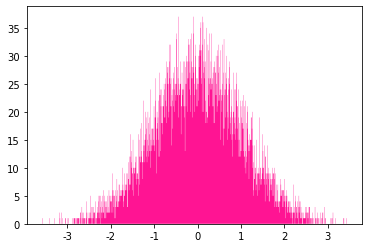

In [14]:
n, bins, patches = plt.hist(x=X #需要分析的变量
                           , bins=1000 #需要把变量分成多少段，即形成多少个柱子的分布
                           , histtype='stepfilled' 
                           , orientation='vertical' 
                           , color='deeppink'
                          )
#自动返回三项内容：每个箱子中含有多少个样本，在变量中划分出的箱子的宽度，用于创建直方图的补丁

In [88]:
n # 每个箱子中含有多少个样本

array([  2.,   1.,   3.,   0.,   5.,   6.,   4.,   9.,   5.,   7.,   4.,
         8.,   7.,  11.,  21.,  29.,  34.,  32.,  39.,  52.,  51.,  75.,
        73.,  77.,  96.,  58.,  95.,  88., 115., 122., 164., 162., 171.,
       212., 214., 206., 251., 238., 249., 271., 272., 288., 275., 327.,
       302., 315., 287., 283., 286., 259., 245., 281., 262., 238., 234.,
       208., 232., 215., 202., 163., 158., 155., 156., 138., 132.,  95.,
       103.,  84.,  71.,  87.,  64.,  55.,  34.,  36.,  33.,  24.,  28.,
        13.,  18.,  20.,  20.,   2.,   8.,   3.,   3.,   5.,   5.,   0.,
         2.,   4.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
         1.])

In [89]:
bins # 在变量中划分出的箱子的宽度

array([-3.44194858, -3.3673664 , -3.29278421, -3.21820202, -3.14361983,
       -3.06903764, -2.99445546, -2.91987327, -2.84529108, -2.77070889,
       -2.6961267 , -2.62154452, -2.54696233, -2.47238014, -2.39779795,
       -2.32321576, -2.24863358, -2.17405139, -2.0994692 , -2.02488701,
       -1.95030482, -1.87572264, -1.80114045, -1.72655826, -1.65197607,
       -1.57739388, -1.5028117 , -1.42822951, -1.35364732, -1.27906513,
       -1.20448294, -1.12990076, -1.05531857, -0.98073638, -0.90615419,
       -0.831572  , -0.75698982, -0.68240763, -0.60782544, -0.53324325,
       -0.45866106, -0.38407888, -0.30949669, -0.2349145 , -0.16033231,
       -0.08575012, -0.01116794,  0.06341425,  0.13799644,  0.21257863,
        0.28716082,  0.361743  ,  0.43632519,  0.51090738,  0.58548957,
        0.66007176,  0.73465394,  0.80923613,  0.88381832,  0.95840051,
        1.0329827 ,  1.10756488,  1.18214707,  1.25672926,  1.33131145,
        1.40589364,  1.48047582,  1.55505801,  1.6296402 ,  1.70

In [91]:
patches  #用于创建直方图的补丁,一个一个补上去

<a list of 1 Patch objects>

In [92]:
[*patches]  

### 4. 认识数据

In [16]:
df = pd.read_csv("data/mpg_ggplot2.csv")

In [17]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [18]:
df.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

In [19]:
name = ["汽车制造商","型号名称","发动机排量(L)","制造年份","气缸数量","手动/自动"
              ,"驱动类型","城市里程/加仑","公路里程/加仑","汽油种类","车辆种类"]

#驱动类型：四轮，前轮，后轮
#能源种类：汽油，柴油，用电等等
#车辆种类：皮卡，SUV，小型，中型等等
#城市里程/加仑，公路里程/加仑：表示使用没加仑汽油能够跑的英里数，所以这个数值越大代表汽车越节能

In [20]:
[*zip(df.columns.values,np.array(name))]

[('manufacturer', '汽车制造商'),
 ('model', '型号名称'),
 ('displ', '发动机排量(L)'),
 ('year', '制造年份'),
 ('cyl', '气缸数量'),
 ('trans', '手动/自动'),
 ('drv', '驱动类型'),
 ('cty', '城市里程/加仑'),
 ('hwy', '公路里程/加仑'),
 ('fl', '汽油种类'),
 ('class', '车辆种类')]

### 5. 绘制图像，代码详解

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/plt.GridSpec%E5%9C%A8%E5%B9%B2%E5%95%A5.PNG" align="center" />

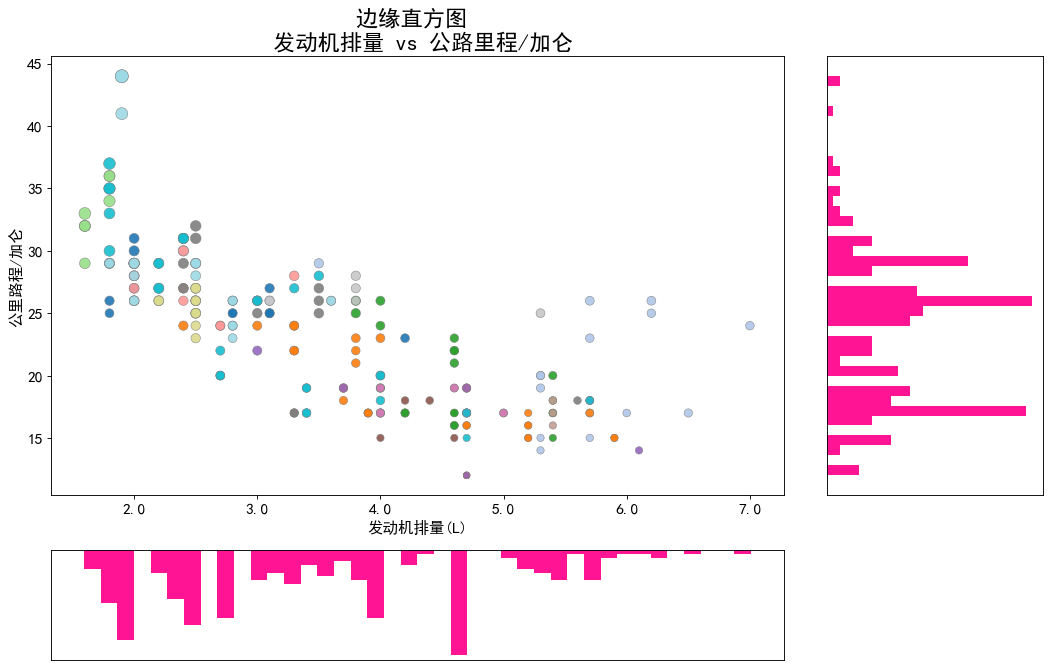

In [26]:
#分割画布
fig = plt.figure(figsize=(16, 10), dpi= 80,facecolor="white")
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

#在分割完毕的画布上确认子图的位置
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

#在中心绘制气泡图
ax_main.scatter('displ', 'hwy'
                , s=df.cty*4 #设置尺寸以影响气泡图，这里是城市里程/加仑
                , data=df
                , c=df.manufacturer.astype('category').cat.codes #这是按类别编码的一种写法，之前用不同float
                , cmap="tab20" #colormap可以根据自己喜欢的随意修改
                , edgecolors='gray', linewidths=.5, alpha=.9)

#绘制底部的直方图
ax_bottom.hist(df.displ, 40, histtype='stepfilled', orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis() #让y轴反向，为了美观所以让分布形成朝下的分布，倒一下

#绘制右边的直方图
ax_right.hist(df.hwy, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')

#装饰图像
plt.rcParams['font.sans-serif']=['Simhei']  # 显示中文
# 设置主题
ax_main.set(title='边缘直方图 \n 发动机排量 vs 公路里程/加仑'
            , xlabel='发动机排量(L)'
            , ylabel='公里路程/加仑')#设置标题，横坐标轴和纵坐标轴的名称
ax_main.title.set_fontsize(20) #对标题设置字体大小

for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14) #对所有横坐标纵坐标上的标题和标尺都设置字体，一次性对所有标尺和label字体进行设置

for item in [ax_bottom,ax_right]:
    item.set_xticks([])
    item.set_yticks([]) #去掉两个直方图上的标尺，一点点凸起
    
xlabels = ax_main.get_xticks().tolist() #将现有的标尺取出来，转化为带一位小数的浮点数
ax_main.set_xticklabels(xlabels) #再将带一位小数的浮点数变成标尺
plt.show()

In [27]:
ax_main.title #标题的位置 + 标题的内容  0.5正中央

Text(0.5, 1, '边缘直方图 \n 发动机排量 vs 公路里程/加仑')

In [28]:
df.manufacturer.astype('category') # 将字符串变成分类型

0            audi
1            audi
2            audi
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10           audi
11           audi
12           audi
13           audi
14           audi
15           audi
16           audi
17           audi
18      chevrolet
19      chevrolet
20      chevrolet
21      chevrolet
22      chevrolet
23      chevrolet
24      chevrolet
25      chevrolet
26      chevrolet
27      chevrolet
28      chevrolet
29      chevrolet
          ...    
204        toyota
205        toyota
206        toyota
207    volkswagen
208    volkswagen
209    volkswagen
210    volkswagen
211    volkswagen
212    volkswagen
213    volkswagen
214    volkswagen
215    volkswagen
216    volkswagen
217    volkswagen
218    volkswagen
219    volkswagen
220    volkswagen
221    volkswagen
222    volkswagen
223    volkswagen
224    volkswagen
225    volkswagen
226    volkswagen
227    volkswagen
228    vol

In [29]:
df.manufacturer.astype('category').cat.codes #常用的编码方式，变成数字

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
204    13
205    13
206    13
207    14
208    14
209    14
210    14
211    14
212    14
213    14
214    14
215    14
216    14
217    14
218    14
219    14
220    14
221    14
222    14
223    14
224    14
225    14
226    14
227    14
228    14
229    14
230    14
231    14
232    14
233    14
Length: 234, dtype: int8

In [30]:
([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels())
#所有标文字位置

[Text(0.5, 152.39393939393932, '发动机排量(L)'),
 Text(22.921875000000007, 0.5, '公里路程/加仑'),
 Text(1.0, 0, '1.0'),
 Text(2.0, 0, '2.0'),
 Text(3.0, 0, '3.0'),
 Text(4.0, 0, '4.0'),
 Text(5.0, 0, '5.0'),
 Text(6.0, 0, '6.0'),
 Text(7.0, 0, '7.0'),
 Text(8.0, 0, '8.0'),
 Text(0, 10.0, '10'),
 Text(0, 15.0, '15'),
 Text(0, 20.0, '20'),
 Text(0, 25.0, '25'),
 Text(0, 30.0, '30'),
 Text(0, 35.0, '35'),
 Text(0, 40.0, '40'),
 Text(0, 45.0, '45'),
 Text(0, 50.0, '50')]

In [31]:
ax_main.xaxis.label #提取出我们的X轴的标签

Text(0.5, 152.39393939393932, '发动机排量(L)')

In [32]:
ax_main.yaxis.label

Text(22.921875000000007, 0.5, '公里路程/加仑')

In [33]:
[ax_main.xaxis.label, ax_main.yaxis.label]

[Text(0.5, 152.39393939393932, '发动机排量(L)'),
 Text(22.921875000000007, 0.5, '公里路程/加仑')]

In [34]:
ax_main.get_xticklabels() + ax_main.get_yticklabels() #前两个数字表示位置，最后表示我们设定的标签

[Text(1.0, 0, '1.0'),
 Text(2.0, 0, '2.0'),
 Text(3.0, 0, '3.0'),
 Text(4.0, 0, '4.0'),
 Text(5.0, 0, '5.0'),
 Text(6.0, 0, '6.0'),
 Text(7.0, 0, '7.0'),
 Text(8.0, 0, '8.0'),
 Text(0, 10.0, '10'),
 Text(0, 15.0, '15'),
 Text(0, 20.0, '20'),
 Text(0, 25.0, '25'),
 Text(0, 30.0, '30'),
 Text(0, 35.0, '35'),
 Text(0, 40.0, '40'),
 Text(0, 45.0, '45'),
 Text(0, 50.0, '50')]

In [124]:
ax_main.get_xticks().tolist()

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]

### 6. 解读图像

直方图探索分布，直方越高点越多

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 07/50 边缘箱线图

边缘箱线图是在散点图的边缘分别画上对横纵坐标的箱线图，以对原始的散点图进行补充的图像。  

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/07%20%E7%AE%B1%E7%BA%BF%E5%9B%BE.PNG" align="center" />

横坐标：发动机排量(L)<br>
纵坐标：公路里程/加仑  
虽然没有显示图例不过散点有颜色：制造商

### 1. 导入需要的绘图库

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2. 认识箱线图及绘制箱线图的函数

箱线图，又叫做箱型图，箱图，是一种用于显示一个变量分布情况的统计图。其核心作用和直方图类似，我们在统计学和机器学习中也使用它来观察数据是否处于偏态，只不过直方图更著重于看到数据在整个取值区间上的分布，而箱线图更着重于观察变量上的重要分割点。箱线图能够精确地显示有关数据分布的关键数据节点，因此也常被用来作为查找异常值的方式。  
  
认识箱线图的第一步是学会阅读箱线图：

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/%E7%AE%B1%E7%BA%BF%E5%9B%BE.PNG" align="center" />

其中上四分位数就是直方图中占75%数据量的位置，下四分位数就是直方图中占25%数据量的位置。但这些在分布上代表了什么含义呢？

### **箱线图 vs 直方图**

直方图和箱线图都表达数据的分布，从下面的图可以看出来，两者是一一对应的。  
当直方图的分布越接近正太分布，箱线图也会越对称  
直方图的柱子较高较多的地方，就会是箱线图的箱子所在的地方  
箱线图所显示的中位数一般都会非常接近直方图中最高的柱子（毕竟这个取值范围内的样本点最多）

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/%E7%9B%B4%E6%96%B9%E5%9B%BEvs%E7%AE%B1%E7%BA%BF%E5%9B%BE.PNG" align="center" />

#### **sns.boxplot()**

> **重要参数**
>> x ：需要绘制箱线图的变量  
>> ax ：需要绘制箱线图的子图  
>> orient ：箱线图的方向，可选填"v"或者"h"来决定箱线图的方向  
>> meanline ：是否显示均值线  

In [14]:
#正态分布下的随机数
X = np.random.randn(1000)
#严重偏态分布下的随机数
#X = np.random.randint(0,300,50).tolist() + np.random.randint(300,800,50).tolist() + np.random.randint(800,1000,900).tolist() 

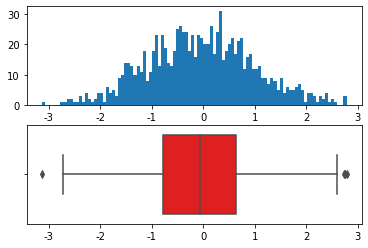

In [15]:
fig, (ax1,ax2) = plt.subplots(2)  # 画布和子图 
# fig = plt.figure()
# ax = fig.add_subplot(2,1,1)

#直方图
ax1.hist(X,bins=100)

#箱线图
sns.boxplot(x=X #研究的变量
            ,ax=ax2 #绘制的子图
            , orient="h"
            , color="red"
           ,meanline=True);

来计算下极值？首先找出四分位距。NumPy中的percentile功能可以帮助我们找出位于分布a%处的分位数  

In [18]:
Q3, Q1 = np.percentile(X, [75 ,25]) # 分位数位置

In [19]:
iqr = Q3-Q1  # x值差

In [20]:
iqr

1.403438261034169

In [21]:
min(X)

-3.130147104799591

In [22]:
Q1 - 1.5*iqr

-2.8804641416713186

In [23]:
max(X)

2.784322695672688

In [24]:
Q3 + 1.5*iqr

2.733288902465357

### 3. 导入数据，绘制图像

In [26]:
#导入数据
df = pd.read_csv("data/mpg_ggplot2.csv")

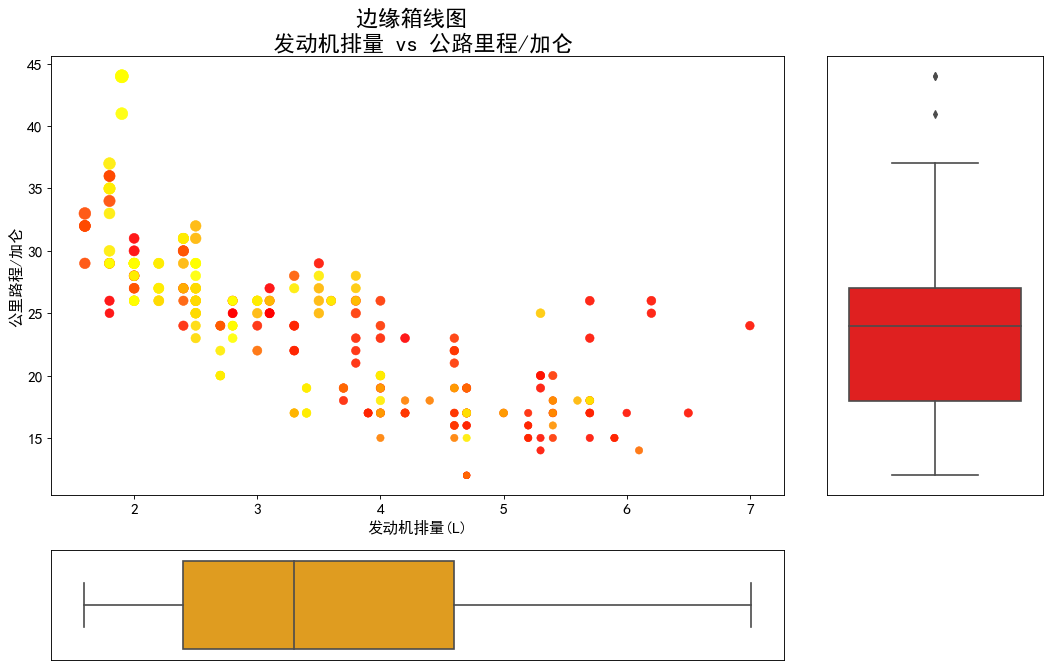

In [27]:
#分割画布
fig = plt.figure(figsize=(16, 10), dpi= 80,facecolor="white")
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

#在分割完毕的画布上确认子图的位置
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

#在中心绘制气泡图
ax_main.scatter('displ', 'hwy', s=df.cty*4
                , c=df.manufacturer.astype('category').cat.codes
                , alpha=.9, data=df, cmap="autumn", linewidths=.5)



#对右侧和下方绘制箱线图
sns.boxplot(x=df.hwy,ax=ax_right, orient="v", color="red")
sns.boxplot(df.displ, ax=ax_bottom, orient="h",color='orange')




#装饰图像

#移除箱线图自带的坐标轴名称
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')


#设置标题，横坐标轴和纵坐标轴的名称
plt.rcParams['font.sans-serif']=['Simhei']
ax_main.set(title='边缘箱线图 \n 发动机排量 vs 公路里程/加仑', xlabel='发动机排量(L)', ylabel='公里路程/加仑')

#去掉两个直方图上的标尺
for item in [ax_bottom,ax_right]:
    item.set_xticks([])
    item.set_yticks([])

#对标题设置字体大小
ax_main.title.set_fontsize(20) 

#对所有横坐标纵坐标上的标题和标尺都设置字体大小
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14) 

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

#做业务分析是异常值是宝，训练时才去除